In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [21]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
 )

Found 3042 files belonging to 3 classes.


In [23]:
class_names=dataset.class_names
class_names

['Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [24]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle =  True, shuffle_size= 10000):
    
    
    
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size =int(train_split*ds_size)
    val_size= int (val_split*ds_size)
    
    
    train_ds= ds.take(train_size)
    val_ds =ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds =get_dataset_partitions_tf(dataset)

In [26]:
len(train_ds)

76

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)#optimazing
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])


In [29]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')

    
    
])

model.build(input_shape = input_shape)

In [31]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [34]:
history = model.fit(
    train_ds,
    epochs = 20,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    
    )

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 34s 450ms/step - accuracy: 0.9538 - loss: 0.1199 - val_accuracy: 0.9583 - val_loss: 0.1516
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 467ms/step - accuracy: 0.9654 - loss: 0.1161 - val_accuracy: 0.9653 - val_loss: 0.1225
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 476ms/step - accuracy: 0.9563 - loss: 0.1168 - val_accuracy: 0.9757 - val_loss: 0.0857
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 472ms/step - accuracy: 0.9578 - loss: 0.1287 - val_accuracy: 0.9583 - val_loss: 0.1130
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - accuracy: 0.9645 - loss: 0.1359 - val_accuracy: 0.9688 - val_loss: 0.1068
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 473ms/step - accuracy: 0.9673 - loss: 0.1050 - val_accuracy: 0.9722 - val_loss: 0.0819
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 474ms/step - accuracy: 0.9663 - loss: 0.1042 - val_accuracy: 0.9722 - val_loss: 0.0768
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - accuracy: 0.9640 - loss: 0.0918 - val_accu

In [35]:
loss, accuracy=model.evaluate(test_ds)
loss, accuracy

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9548 - loss: 0.1002


(0.08447268605232239, 0.96875)

In [37]:
model.save('trained_plant_disease_model.keras')

In [40]:
history.history #Return Dictionary of history

{'accuracy': [0.9587843418121338,
  0.9608659744262695,
  0.9608659744262695,
  0.9587843418121338,
  0.9625312089920044,
  0.964196503162384,
  0.9658617973327637,
  0.9666944146156311,
  0.9633638858795166,
  0.9700250029563904,
  0.9596169590950012,
  0.9637801647186279,
  0.9625312089920044,
  0.9633638858795166,
  0.961698591709137,
  0.9671107530593872,
  0.9671107530593872,
  0.9621149301528931,
  0.9596169590950012,
  0.9625312089920044],
 'loss': [0.13636615872383118,
  0.12795378267765045,
  0.12259167432785034,
  0.1261664479970932,
  0.11736229807138443,
  0.11780869215726852,
  0.10915915668010712,
  0.09609521925449371,
  0.11932013183832169,
  0.09123571962118149,
  0.1380392163991928,
  0.11787634342908859,
  0.10810822993516922,
  0.10697970539331436,
  0.11725535988807678,
  0.10698171705007553,
  0.0983971580862999,
  0.114830382168293,
  0.115565724670887,
  0.10690006613731384],
 'val_accuracy': [0.9583333134651184,
  0.9652777910232544,
  0.9756944179534912,
  0.9

In [41]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [42]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


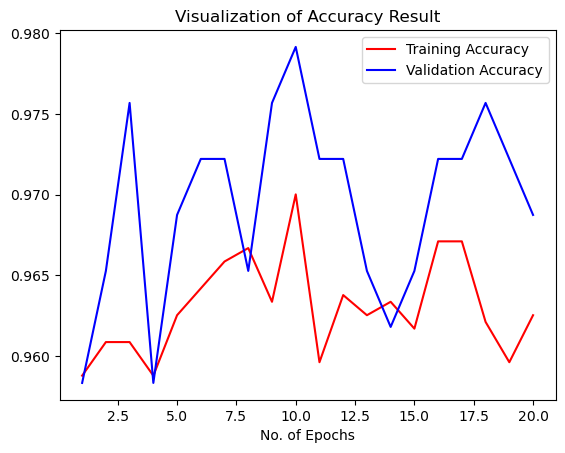

In [46]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

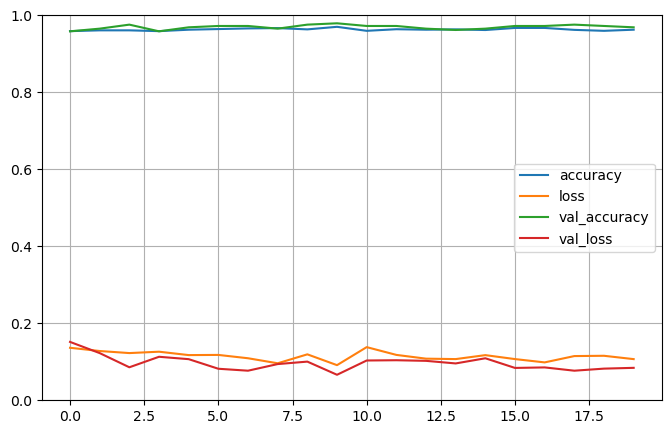

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

first image to predict
actual label :  Gray_Leaf_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Predicted label :  Gray_Leaf_Spot


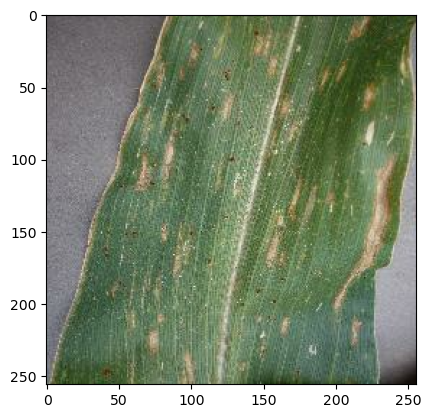

In [48]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label : ",class_names[first_label])

    
    batch_prediction = model.predict(images_batch)
    print("Predicted label : ", class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)#Create a batch
    
    predictions=model.predict(img_array)
    predicted_class= class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


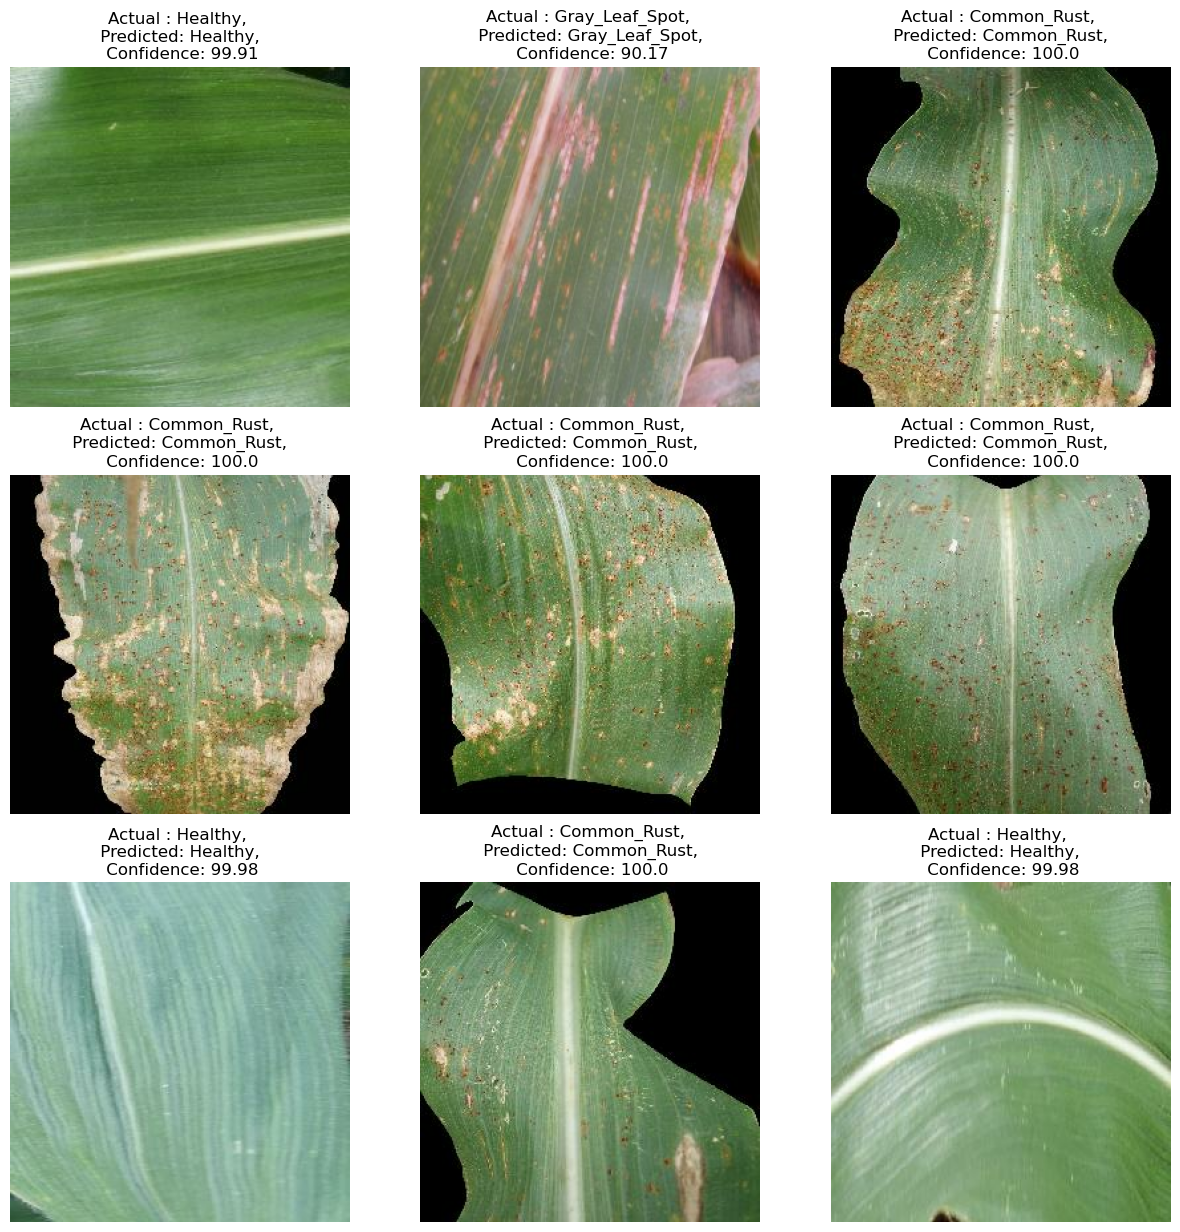

In [50]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        
        plt.axis("off")